In [1]:
# Normalisierung von Werten
# Beispiel zur Vorbereitung von Daten fü LSTMs

In [2]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# define contrived series
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
series = Series(data)
print(series)
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
normalized = scaler.transform(values)
print(normalized)
# inverse transform and print
inversed = scaler.inverse_transform(normalized)
print(inversed)

0     10.0
1     20.0
2     30.0
3     40.0
4     50.0
5     60.0
6     70.0
7     80.0
8     90.0
9    100.0
dtype: float64
Min: 10.000000, Max: 100.000000
[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]
[[ 10.]
 [ 20.]
 [ 30.]
 [ 40.]
 [ 50.]
 [ 60.]
 [ 70.]
 [ 80.]
 [ 90.]
 [100.]]


In [3]:
# Standardizierung der Daten

In [4]:
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt
# define contrived series
data = [1.0, 5.5, 9.0, 2.6, 8.8, 3.0, 4.1, 7.9, 6.3]
series = Series(data)
print(series)
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# normalize the dataset and print
standardized = scaler.transform(values)
print(standardized)
# inverse transform and print
inversed = scaler.inverse_transform(standardized)
print(inversed)

0    1.0
1    5.5
2    9.0
3    2.6
4    8.8
5    3.0
6    4.1
7    7.9
8    6.3
dtype: float64
Mean: 5.355556, StandardDeviation: 2.712568
[[-1.60569456]
 [ 0.05325007]
 [ 1.34354035]
 [-1.01584758]
 [ 1.26980948]
 [-0.86838584]
 [-0.46286604]
 [ 0.93802055]
 [ 0.34817357]]
[[1. ]
 [5.5]
 [9. ]
 [2.6]
 [8.8]
 [3. ]
 [4.1]
 [7.9]
 [6.3]]


In [5]:
# Beispiel encoding & one hot encoding

In [6]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


e:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
# pre-sequence padding (auffüllen von Werten für Matrix Form)

In [8]:
from keras.preprocessing.sequence import pad_sequences
# define sequences
sequences = [
[1, 2, 3, 4],
[1, 2, 3],
[1]
]
# pad sequence
padded = pad_sequences(sequences)
print(padded)

e:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[1 2 3 4]
 [0 1 2 3]
 [0 0 0 1]]


In [9]:
# post-sequence

In [10]:
from keras.preprocessing.sequence import pad_sequences
# define sequences
sequences = [
[1, 2, 3, 4],
[1, 2, 3],
[1]
]
# pad sequence
padded = pad_sequences(sequences, padding='post')
print(padded)

[[1 2 3 4]
 [1 2 3 0]
 [1 0 0 0]]


In [11]:
# Abschneiden der Länge pre

In [12]:
from keras.preprocessing.sequence import pad_sequences
# define sequences
sequences = [
[1, 2, 3, 4],
[1, 2, 3],
[1]
]
# truncate sequence
truncated= pad_sequences(sequences, maxlen=2)
print(truncated)

[[3 4]
 [2 3]
 [0 1]]


In [13]:
# abscheinden der Länge - post

In [14]:
from keras.preprocessing.sequence import pad_sequences
# define sequences
sequences = [
[1, 2, 3, 4],
[1, 2, 3],
[1]
]
# truncate sequence
truncated= pad_sequences(sequences, maxlen=2, truncating='post')
print(truncated)

[[1 2]
 [1 2]
 [0 1]]


In [15]:
# Erzeuge per Shift ein "supervised Problem" links X, rechts y

In [16]:
from pandas import DataFrame
# define the sequence
df = DataFrame()
df['t'] = [x for x in range(10)]
print(df)

   t
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


In [17]:
# siehe oben, jetzt mit y

In [18]:
from pandas import DataFrame
# define the sequence
df = DataFrame()
df['t'] = [x for x in range(10)]
# shift forward
df['t-1'] = df['t'].shift(1)
print(df)

   t  t-1
0  0  NaN
1  1  0.0
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0


In [19]:
# negativer shift

In [20]:
from pandas import DataFrame
# define the sequence
df = DataFrame()
df['t'] = [x for x in range(10)]
# shift backward
df['t+1'] = df['t'].shift(-1)
print(df)

   t  t+1
0  0  1.0
1  1  2.0
2  2  3.0
3  3  4.0
4  4  5.0
5  5  6.0
6  6  7.0
7  7  8.0
8  8  9.0
9  9  NaN


In [ ]:
# 10 Beispielsätze mit einem Merkmal und mehreren Zeitreihen

In [21]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [22]:
data = data.reshape((1, 10, 1))

In [23]:
print(data.shape)

(1, 10, 1)


In [ ]:
# 2 Serien a 10 Beispielen 

In [25]:
from numpy import array
data = array([
[0.1, 1.0],
[0.2, 0.9],
[0.3, 0.8],
[0.4, 0.7],
[0.5, 0.6],
[0.6, 0.5],
[0.7, 0.4],
[0.8, 0.3],
[0.9, 0.2],
[1.0, 0.1]])

In [26]:
data = data.reshape(1, 10, 2)
print(data.shape)

(1, 10, 2)


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from pandas import DataFrame
from numpy import array

# return training data
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((5, 1, 1))
    return X, y

# return validation data
def get_val():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((len(X), 1, 1))
    return X, y

# fit an LSTM model
def fit_model(n_cells):
    # define model
    model = Sequential()
    model.add(LSTM(n_cells, input_shape=(1,1)))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mse', optimizer='adam')
    # fit model
    X,y = get_train()
    model.fit(X, y, epochs=500, shuffle=False, verbose=0)
    # evaluate model
    valX, valY = get_val()
    loss = model.evaluate(valX, valY, verbose=0)
    return loss

# define scope of search
params = [1, 5, 10]
n_repeats = 5
# grid search parameter values
scores = DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print('>%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values
    # summary statistics of results
    print(scores.describe())


Using TensorFlow backend.


>1/5 param=1.000000, loss=0.334582
>2/5 param=1.000000, loss=0.178857
>3/5 param=1.000000, loss=0.162013
>4/5 param=1.000000, loss=0.374037
>5/5 param=1.000000, loss=0.184850
              1
count  5.000000
mean   0.246868
std    0.099421
min    0.162013
25%    0.178857
50%    0.184850
75%    0.334582
max    0.374037
>1/5 param=5.000000, loss=0.058056
>2/5 param=5.000000, loss=0.087116
>3/5 param=5.000000, loss=0.141468
>4/5 param=5.000000, loss=0.064307
>5/5 param=5.000000, loss=0.058032
              1         5
count  5.000000  5.000000
mean   0.246868  0.081796
std    0.099421  0.035437
min    0.162013  0.058032
25%    0.178857  0.058056
50%    0.184850  0.064307
75%    0.334582  0.087116
max    0.374037  0.141468
>1/5 param=10.000000, loss=0.016541
>2/5 param=10.000000, loss=0.012787
>3/5 param=10.000000, loss=0.011312
>4/5 param=10.000000, loss=0.022226
>5/5 param=10.000000, loss=0.063955
              1         5        10
count  5.000000  5.000000  5.000000
mean   0.246868  0.0

<Figure size 640x480 with 1 Axes>

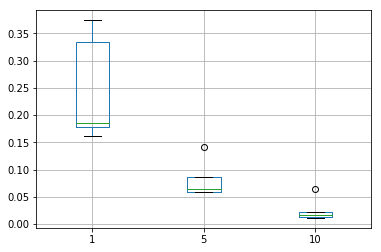

In [2]:
# box and whisker plot of results
scores.boxplot()
pyplot.show()